Importing Required Libraries

In [ ]:
pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import joblib
from ucimlrepo import fetch_ucirepo

# Sklearn tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import warnings
warnings.filterwarnings("ignore")

Loading & Exploring Dataset

In [ ]:
# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Convert to DataFrame
X = heart_disease.data.features
y = heart_disease.data.targets
# Rename the target column to 'target' to ensure the plotting code works correctly
y = y.rename(columns={y.columns[0]: 'target'})
df = pd.concat([X, y], axis=1)

# Display first few rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Checking Data Summary

In [ ]:
# Check missing values
print("Missing Values:\n", df.isnull().sum())

# Dataset information
print("\nDataset Info:")
df.info()

# Statistical Summary
print("\nDataset Summary:")
df.describe()

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Exploratory Data Analysis (EDA)

🔹 Class Distribution

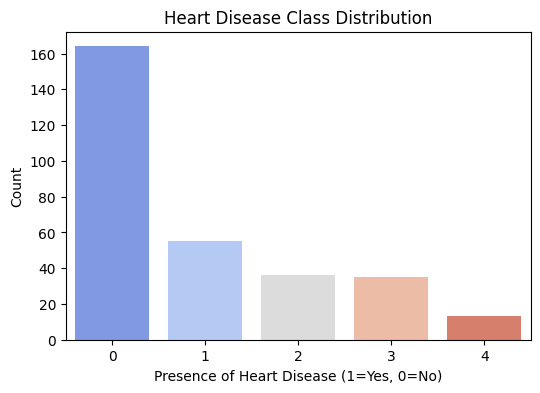

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['target'], palette="coolwarm")
plt.title("Heart Disease Class Distribution")
plt.xlabel("Presence of Heart Disease (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

🔹 Correlation Heatmap

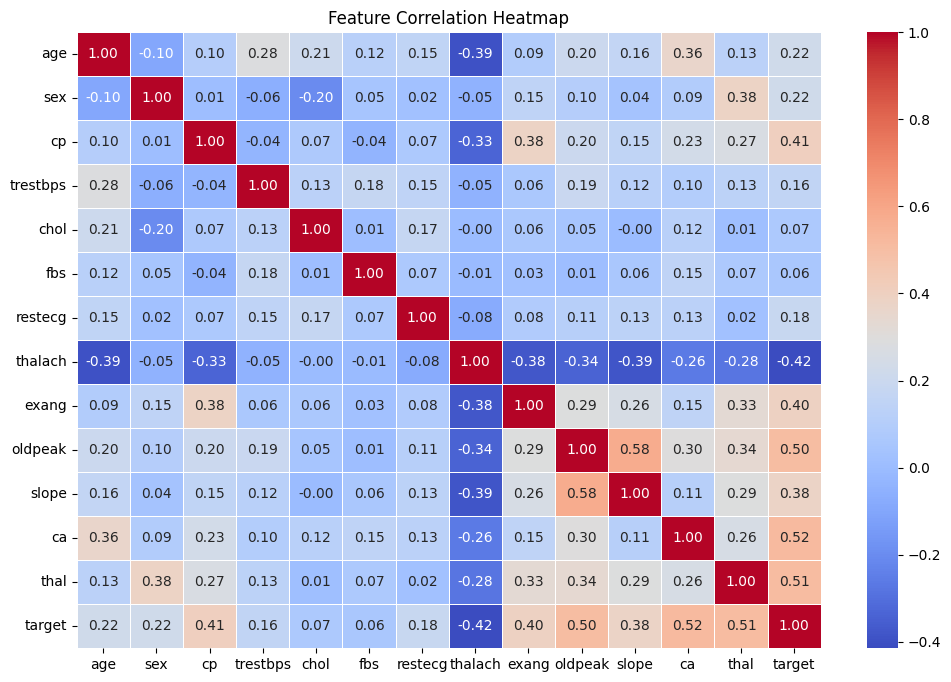

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

🔹 Pairplot (Visualizing Feature Relationships)

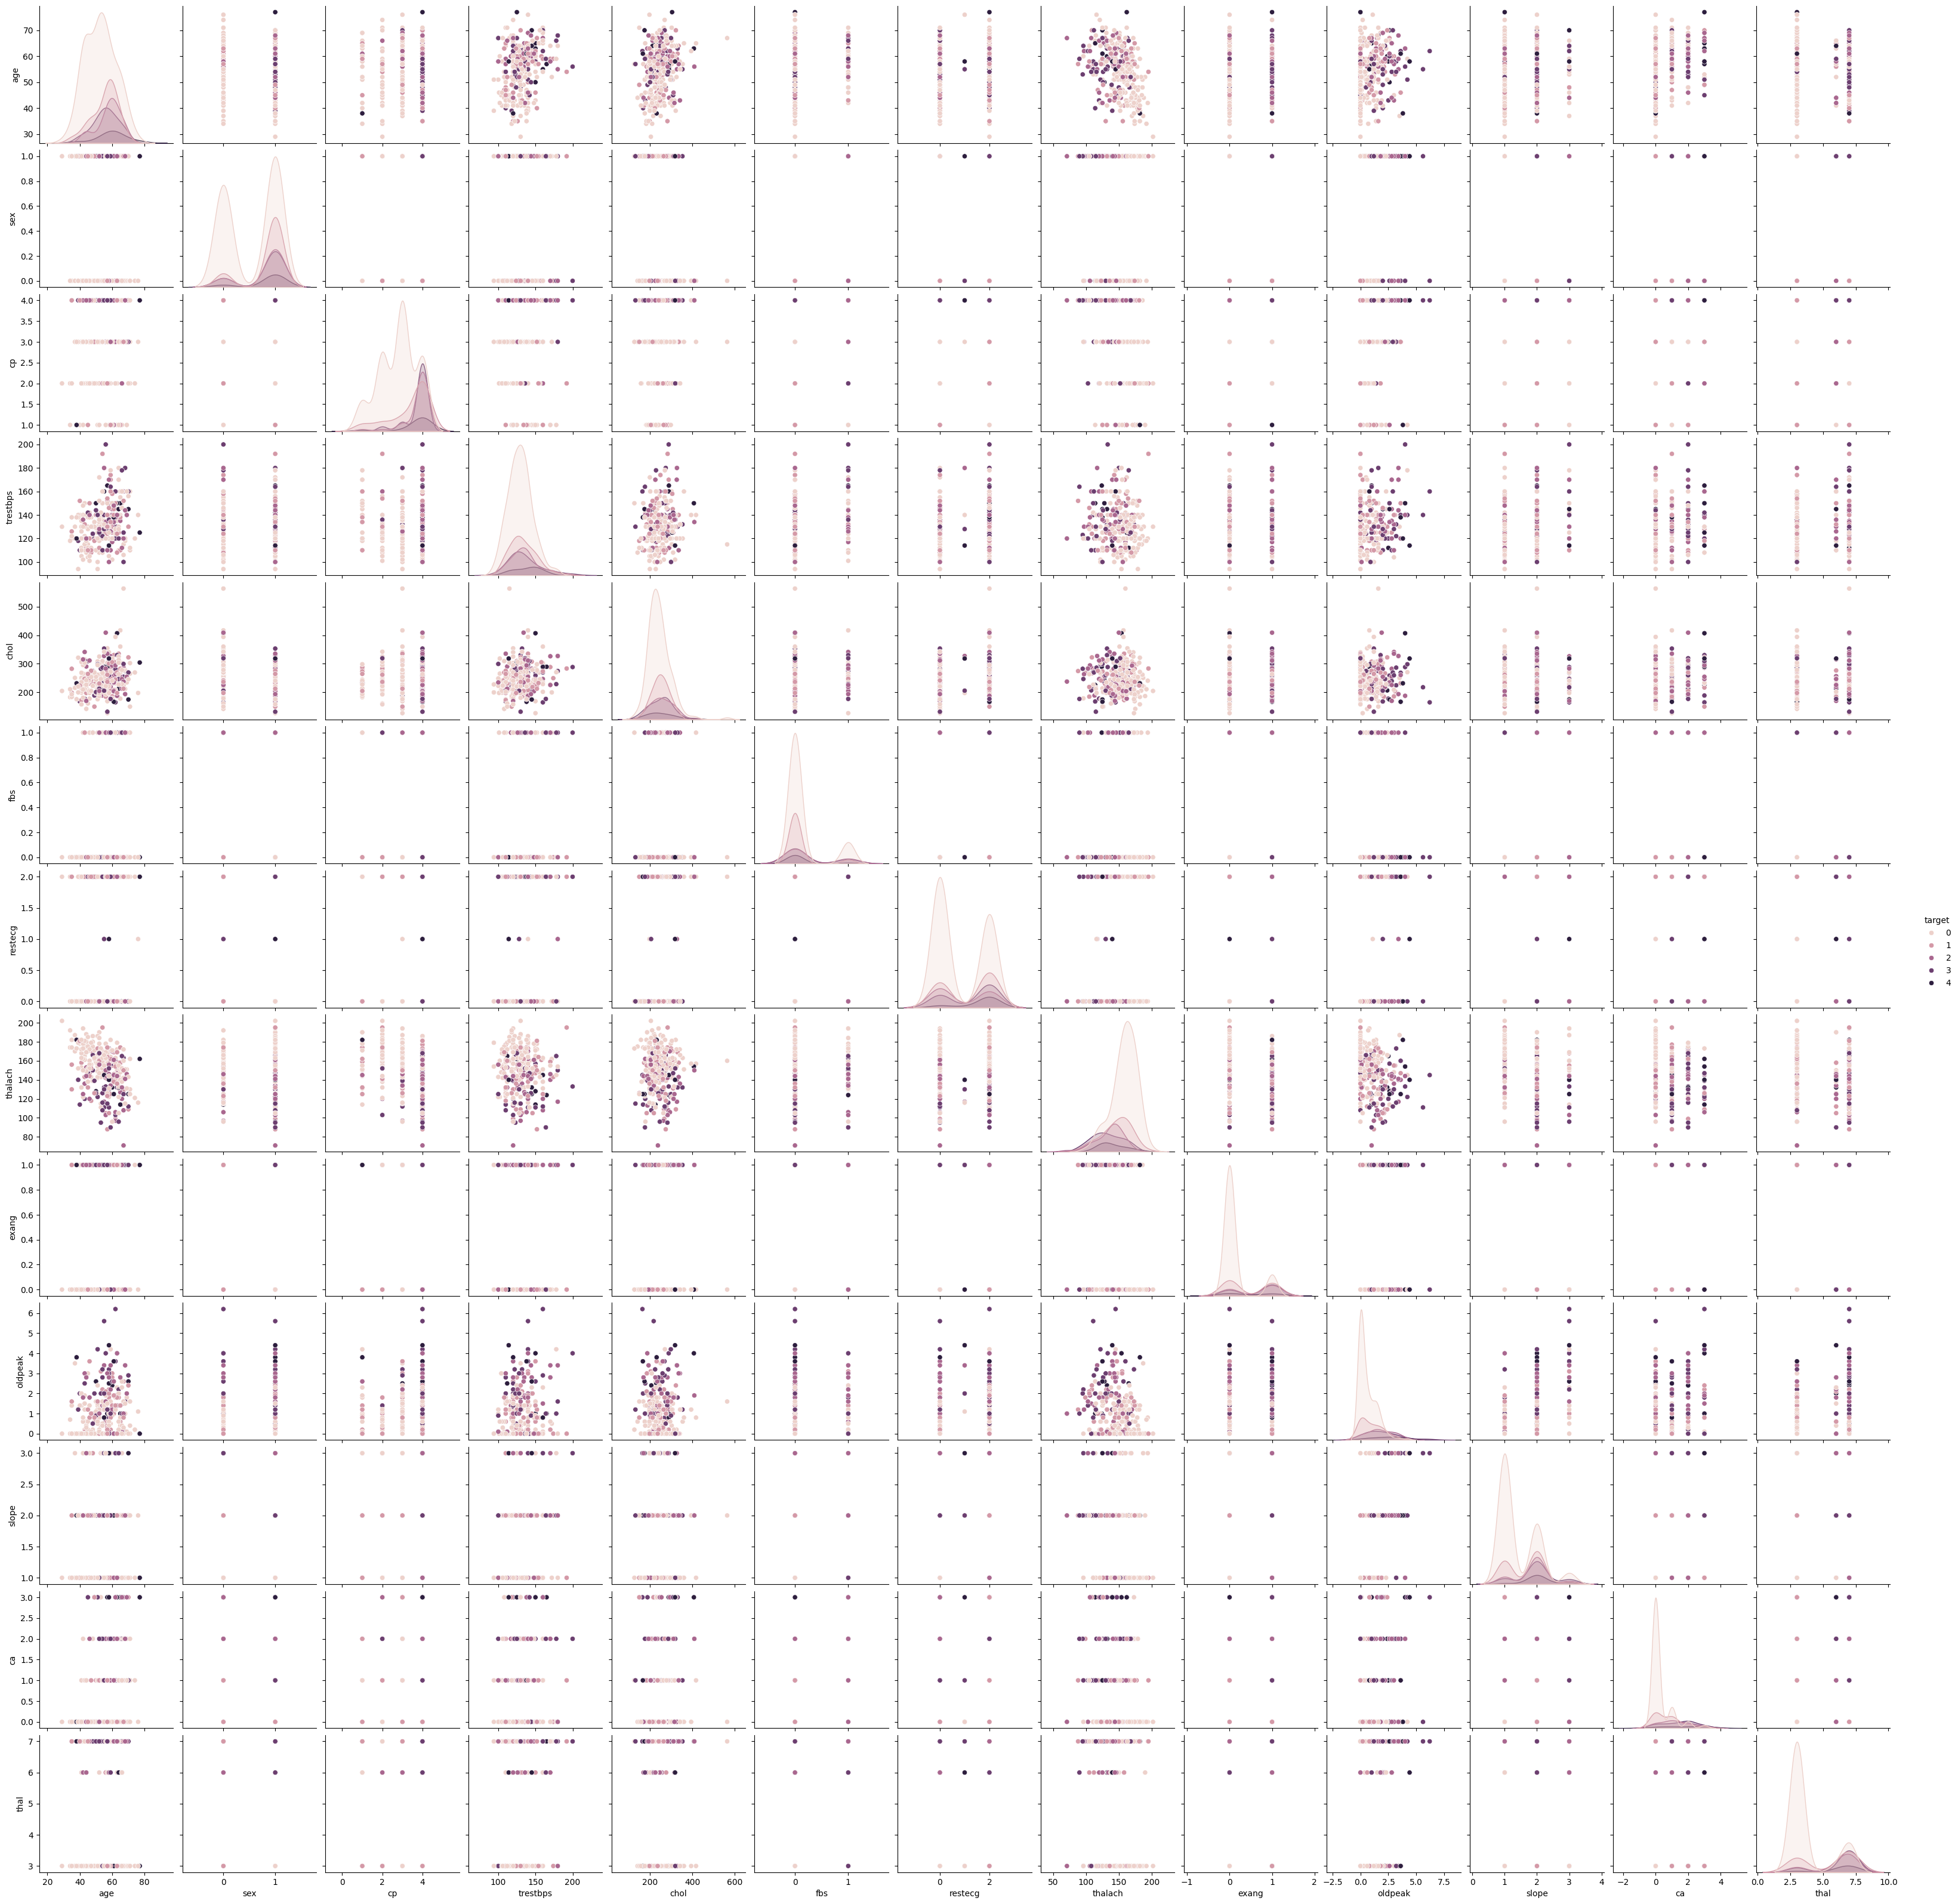

In [ ]:
sns.pairplot(df, hue="target", diag_kind="kde")
plt.show()

🔹 Feature Distributions

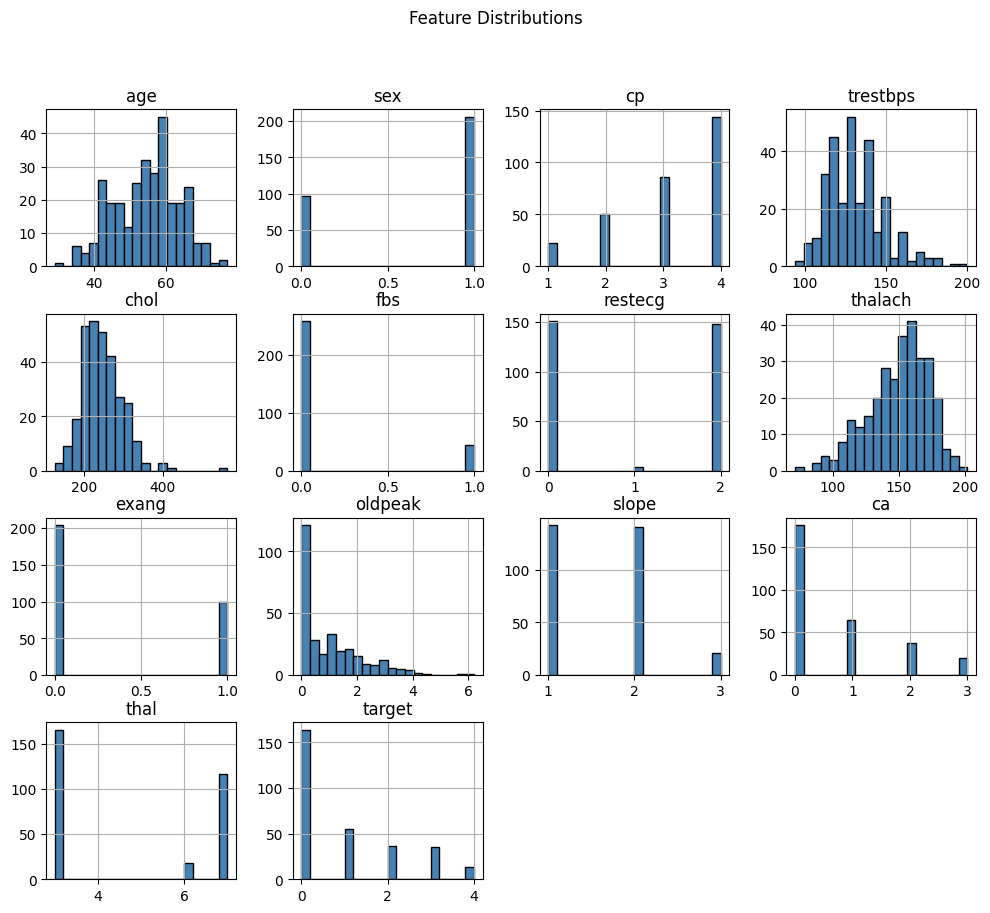

In [ ]:
df.hist(figsize=(12,10), bins=20, color="steelblue", edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()

Feature Engineering & Preprocessing

🔹 Encoding Categorical Features

In [ ]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

🔹 Splitting Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

🔹 Standardization

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Feature Selection Using SHAP


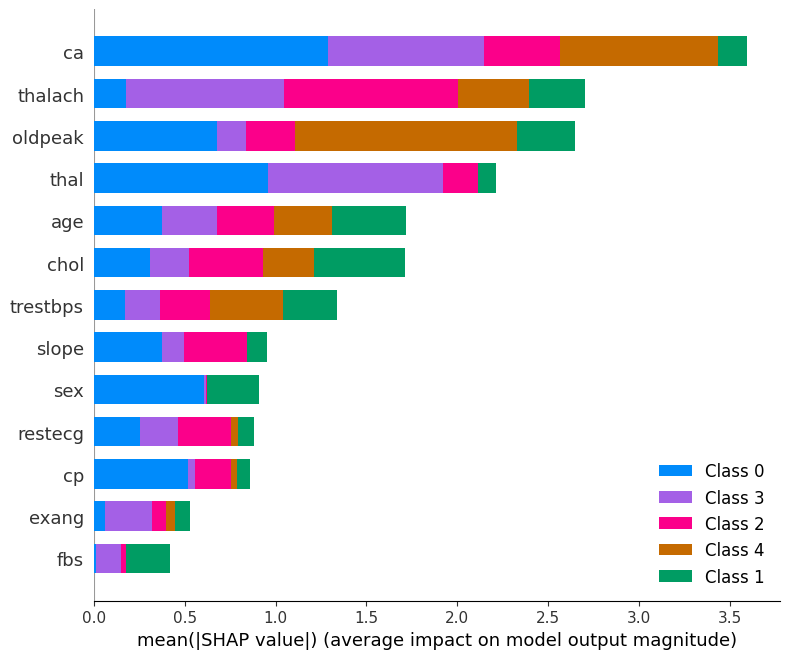

In [ ]:
model = XGBClassifier()
model.fit(X_train_scaled, y_train)

explainer = shap.Explainer(model)
shap_values = explainer(X_test_scaled)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test)

Machine Learning Models

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train)
X_test_scaled = imputer.transform(X_test)


🔹 Model Training & Hyperparameter Tuning

Handling Class Imbalance with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Check the new class distribution
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution after SMOTE: Counter({'target': 1})


Feature Selection Using Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE

# Use a Random Forest as the base estimator
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=10)
X_train_selected = rfe.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = rfe.transform(X_test_scaled)

# Check selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['age', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')


In [ ]:
df['cp'] = df['cp'].astype('category').cat.codes

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows after feature engineering
print("\nDataset after feature engineering:")
print(df.head())


Dataset after feature engineering:
        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.948726    1   0  0.757525 -0.264900    1        2  0.017197      0   
1  1.392002    1   3  1.611220  0.760415    0        2 -1.821905      1   
2  1.392002    1   3 -0.665300 -0.342283    0        2 -0.902354      1   
3 -1.932564    1   2 -0.096170  0.063974    0        0  1.637359      0   
4 -1.489288    0   1 -0.096170 -0.825922    0        2  0.980537      0   

    oldpeak  slope   ca  thal  target  
0  1.087338      3  0.0   6.0       0  
1  0.397182      2  3.0   3.0       2  
2  1.346147      2  2.0   7.0       1  
3  2.122573      3  0.0   3.0       0  
4  0.310912      1  0.0   3.0       0  


In [ ]:
# Split the dataset into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("\nShape of training set (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of testing set (X_test, y_test):", X_test.shape, y_test.shape)


Shape of training set (X_train, y_train): (212, 13) (212,)
Shape of testing set (X_test, y_test): (91, 13) (91,)


In [ ]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') # or 'median', or other strategies
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Model 1: Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)


y_pred_log_reg = log_reg.predict(X_test)

# Evaluation
print("\nLogistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log_reg, average='weighted'):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, log_reg.predict_proba(X_test), multi_class='ovr'):.4f}")


conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Model 2: Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


y_pred_dt = dt.predict(X_test)

# Evaluation
print("\nDecision Tree Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, dt.predict_proba(X_test), multi_class='ovr'):.4f}")


conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Model 3: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Evaluation
print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr'):.4f}")


conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()